# Turing Patterning

The following jupyter notebook outlines examples of patterning following a two species reaction-diffusion system.

### Imports Needed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from os.path import expanduser

from species import *

### Functions 
These functions are used throughout the analysis of turing-patterns

In [2]:
def nextConcentrationArray(sys, specA, specB, t):
    t -= 1
    
    X1 = specA.conc[t]
    nextConcA = np.zeros(len(X1))
    
    X2 = specB.conc[t]
    nextConcB = np.zeros(len(X2))

    production = np.zeros(len(X1))
    for i in range(len(X1)):   
        production[i] = hill(X1[i], X2[i])
    
    # Species A
    for i in range(1, len(X1)- 1):
        nextConcA[i] = X1[i] + specA.diff*sys.delta_t/sys.delta_x**2*(X1[i-1] - 2*X1[i] + X1[i+1]) + sys.delta_t*specA.alpha*production[i]      -sys.delta_t*specA.beta*X1[i] 

    # Boundary Conditions
    nextConcA[0] = nextConcA[1] ; nextConcA[-1] = nextConcA[-2]

    # Species B
    for i in range(1, len(X2)- 1):
        nextConcB[i] = X2[i] + specB.diff*sys.delta_t/sys.delta_x**2*(X2[i-1] - 2*X2[i] + X2[i+1]) + sys.delta_t*specB.alpha*production[i]      -sys.delta_t*specB.beta*X2[i] 

    # Boundary Conditions
    nextConcB[0] = nextConcB[1] ; nextConcB[-1] = nextConcB[-2]

    return nextConcA, nextConcB

In [2]:
def hill(A, B, mode='step'):
    """
    Hill Production Function.

    :param A: Concentration of species A
    :param B: Concentration of species B
    :param mode: Whether the system should follow a smooth or discrete coupling mechansim 
            Default: step - discrete coupling
    """
    if mode is 'step':
        if A - B > 0:
            return 1
        else:
            return 0

    elif mode is 'smooth':
        h = 3
        return A ** h / (A ** h + B ** h)

def initial_hump_center(L, x):
    return 4*1/(1+np.exp(-1/(L/20)*(x-L/2)))*(1-1/(1+np.exp(-1/(L/20)*(x-L/2))))

def initial_hump_left(L, x):
    return 4*1/(1+np.exp(-1/(L/20)*x))*(1-1/(1+np.exp(-1/(L/20)*x)))

## Part 1. An example of turing mechanism leading to a pattern in 1D

Intialization of the system

Running the calculations

In [4]:
speciesA = ReacSpecies(1, 0.5, 1, init_conc=1.0)
speciesB = ReacSpecies(4*speciesA.alpha, 2*speciesA.beta, 30*speciesA.diff, init_conc=1.0)

length_x = 10
length_t = 1
sys = System(length_x, length_t, speciesA, speciesB)

# Add initial distribution 
speciesA.conc.append(initial_hump_left(length_x, sys.x))
speciesB.conc.append(initial_hump_left(length_x, sys.x))



delta t :   0.00013332222314807102


Initial Distribution of species in the system

Text(0, 0.5, 'Concentration [a. u.]')

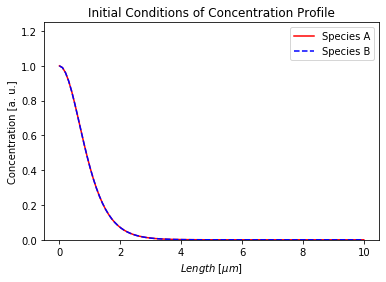

In [5]:
plt.plot(sys.x[1:-1],initial_hump_left(length_x, sys.x)[1:-1] ,"r-", label="Species A")
plt.plot(sys.x[1:-1], initial_hump_left(length_x, sys.x)[1:-1], "b--", label="Species B")
plt.ylim(0,1.25)
plt.legend()
plt.title("Initial Conditions of Concentration Profile")
plt.xlabel(r"$Length\ [\mu m]$")
plt.ylabel("Concentration [a. u.]")

In [ ]:
for i in range(1, len(sys.t)):
    nextA, nextB = nextConcentrationArray(sys, speciesA, speciesB, i)
    speciesA.conc.append(nextA)
    speciesB.conc.append(nextB)

Plotting the results

In [ ]:
index = -1
plt.plot(sys.x[1:-1], speciesA.conc[index][1:-1],"r-", label="Species A")
plt.plot(sys.x[1:-1], speciesB.conc[index][1:-1], "b--", label="Species B")
plt.ylim(0,1.25)
plt.legend()
plt.title("Steady-Sate Concentration Profile")
plt.xlabel(r"$Length\ [\mu m]$")
plt.ylabel("Concentration [a. u.]")

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, sys.length_x))
ax.set_ylim((0, 1))

lines = []
colours = ["r-", "b--"]

for i in range(2):
    line, = ax.plot([], [], colours[i], lw=2)
    lines.append(line)

def init():
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i):
    x = sys.x[1:-1]
    y = (speciesA.conc[i][1:-1], speciesB.conc[i][1:-1])
    
    for i, line in enumerate(lines):
        line.set_data(x, y[i])
    return lines

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=10, blit=True)
rc('animation', html='jshtml')
plt.close()


In [ ]:
anim

## Part 2. As the system sized is increased, the system shows periodic behaviour

In [ ]:
speciesA = ReacSpecies(1, 0.5, 1, init_conc=1.0)
speciesB = ReacSpecies(4*speciesA.alpha, 2*speciesA.beta, 30*speciesA.diff, init_conc=1.0)

length_x = 100
length_t = 500
sys = System(length_x, length_t, speciesA, speciesB, delta_x=1)

# Add initial distribution 
speciesA.conc.append(initial_hump_left(length_x, sys.x))
speciesB.conc.append(initial_hump_left(length_x, sys.x))

In [ ]:
index = 0
plt.plot(sys.x[1:-1], speciesA.conc[index][1:-1],"r-", label="Species A")
plt.plot(sys.x[1:-1], speciesB.conc[index][1:-1], "b--", label="Species B")
plt.ylim(0, 1)
plt.legend()
plt.title("Initial Condition for a larger system size")
plt.xlabel(r"$Length\ [\mu m]$")
plt.ylabel("Concentration [a. u.]")


In [ ]:
plt.save(expanduser("~/Desktop/Initial Large Size.pdf"))

Running the calculations

In [ ]:
for i in range(1, len(sys.t)):
    nextA, nextB = nextConcentrationArray(sys, speciesA, speciesB, i)
    speciesA.conc.append(nextA)
    speciesB.conc.append(nextB)

Plotting the results

In [ ]:
index = -1
plt.plot(sys.x[1:-1], speciesA.conc[index][1:-1],"r-", label="Species A")
plt.plot(sys.x[1:-1], speciesB.conc[index][1:-1], "b--", label="Species B")
plt.ylim(0,1.25)
plt.legend()
plt.title("Pattern Formation for a larger system size")
plt.xlabel(r"$Length\ [\mu m]$")
plt.ylabel("Concentration [a. u.]")

## Part 3. Adding an "expander" molecule allows patterns to scale as the system size increases

In [14]:
def next_conc_expander(sys, specA, specB, specE, t):
    t -= 1
    
    X1 = specA.conc[t]
    nextConcA = np.zeros(len(X1))
    
    X2 = specB.conc[t]
    nextConcB = np.zeros(len(X2))

    X3 = specE.conc[t]
    nextConcE = np.zeros(len(X3))

    production = np.zeros(len(X1))
    for i in range(len(X1)):   
        production[i] = hill(X1[i], X2[i])
    
    # Species A
    for i in range(1, len(X1)- 1):
        nextConcA[i] = X1[i] + specA.diff*sys.delta_t/sys.delta_x**2*(X1[i-1] - 2*X1[i] + X1[i+1]) + sys.delta_t*specA.alpha*production[i]      -sys.delta_t*specA.kap*X3[i]*X1[i]

    # Boundary Conditions
    nextConcA[0] = nextConcA[1] ; nextConcA[-1] = nextConcA[-2]

    # Species B
    for i in range(1, len(X2)- 1):
        nextConcB[i] = X2[i] + specB.diff*sys.delta_t/sys.delta_x**2*(X2[i-1] - 2*X2[i] + X2[i+1]) + sys.delta_t*specB.alpha*production[i]      -sys.delta_t*specB.kap*X3[i]*X2[i]

    # Boundary Conditions
    nextConcB[0] = nextConcB[1] ; nextConcB[-1] = nextConcB[-2]

    # Species E
    for i in range(1, len(X1)- 1):
        nextConcE[i] = X3[i] + specE.diff*sys.delta_t/sys.delta_x**2*(X3[i-1] - 2*X3[i] + X3[i+1]) + sys.delta_t*specA.alpha - sys.delta_t*specE.kap*X3[i]*X2[i]

    # Boundary Conditions
    nextConcE[0] = nextConcE[1] ; nextConcE[-1] = nextConcE[-2]

    return nextConcA, nextConcB, nextConcE

In [13]:
speciesA = ReacSpecies(1, 0.5, 1, init_conc=1.0)
speciesA.kap = 1
speciesB = ReacSpecies(4*speciesA.alpha, 2*speciesA.beta, 30*speciesA.diff, init_conc=1.0)
speciesB.kap = 2*speciesA.kap
speciesE = ReacSpecies(0.4*speciesA.alpha, 1, 10*speciesA.diff)
speciesE.kap = 2*speciesA.kap

length_x = 10
length_t = 1
sys = System(length_x, length_t, speciesA, speciesB)

# Add initial distribution 
speciesA.conc.append(initial_hump_left(length_x, sys.x))
speciesB.conc.append(initial_hump_left(length_x, sys.x))
speciesE.conc.append(initial_hump_left(length_x, sys.x))

delta t :   0.00013332222314807102


Text(0, 0.5, 'Concentration [a. u.]')

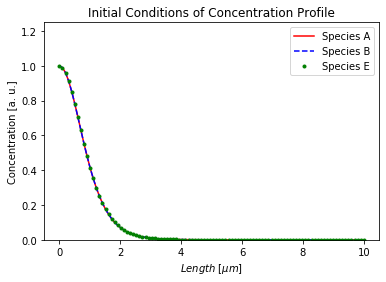

In [6]:
plt.plot(sys.x[1:-1],initial_hump_left(length_x, sys.x)[1:-1] ,"r-", label="Species A")
plt.plot(sys.x[1:-1], initial_hump_left(length_x, sys.x)[1:-1], "b--", label="Species B")
plt.plot(sys.x[1:-1], initial_hump_left(length_x, sys.x)[1:-1], "g.", label="Species E")
plt.ylim(0,1.25)
plt.legend()
plt.title("Initial Conditions of Concentration Profile")
plt.xlabel(r"$Length\ [\mu m]$")
plt.ylabel("Concentration [a. u.]")

In [15]:
for i in range(1, len(sys.t)):
    nextA, nextB, nextE = next_conc_expander(sys, speciesA, speciesB, speciesE, i)
    speciesA.conc.append(nextA)
    speciesB.conc.append(nextB)
    speciesE.conc.append(nextE)

Text(0, 0.5, 'Concentration [a. u.]')

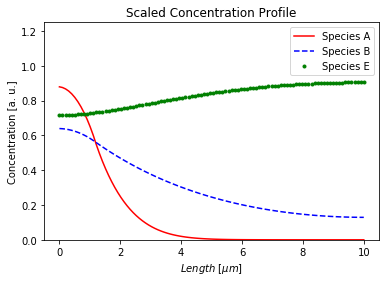

In [16]:
plt.plot(sys.x[1:-1], speciesA.conc[-1][1:-1] ,"r-", label="Species A")
plt.plot(sys.x[1:-1], speciesB.conc[-1][1:-1], "b--", label="Species B")
plt.plot(sys.x[1:-1], speciesE.conc[-1][1:-1], "g.", label="Species E")
plt.ylim(0, 1.25)
plt.legend()
plt.title("Scaled Concentration Profile")
plt.xlabel(r"$Length\ [\mu m]$")
plt.ylabel("Concentration [a. u.]")

Larger Scaled Pattern

In [64]:
speciesA = ReacSpecies(1, 0.5, 1, init_conc=1.0)
speciesA.kap = 1
speciesB = ReacSpecies(4*speciesA.alpha, 2*speciesA.beta, 30*speciesA.diff, init_conc=1.0)
speciesB.kap = 2*speciesA.kap
speciesE = ReacSpecies(0.4*speciesA.alpha, 1, 10*speciesA.diff)
speciesE.kap = 2*speciesA.kap

length_x = 50
length_t = 5
sys = System(length_x, length_t, speciesA, speciesB, delta_x=0.5)

# Add initial distribution 
speciesA.conc.append(initial_hump_left(length_x, sys.x))
speciesB.conc.append(initial_hump_left(length_x, sys.x))
speciesE.conc.append(initial_hump_left(length_x, sys.x))

delta t :   0.001


Text(0, 0.5, 'Concentration [a. u.]')

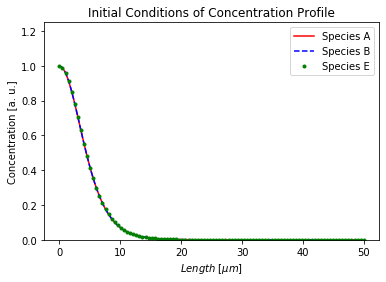

In [65]:
plt.plot(sys.x[1:-1],initial_hump_left(length_x, sys.x)[1:-1] ,"r-", label="Species A")
plt.plot(sys.x[1:-1], initial_hump_left(length_x, sys.x)[1:-1], "b--", label="Species B")
plt.plot(sys.x[1:-1], initial_hump_left(length_x, sys.x)[1:-1], "g.", label="Species E")
plt.ylim(0,1.25)
plt.legend()
plt.title("Initial Conditions of Concentration Profile")
plt.xlabel(r"$Length\ [\mu m]$")
plt.ylabel("Concentration [a. u.]")

In [66]:
for i in range(1, len(sys.t)):
    nextA, nextB, nextE = next_conc_expander(sys, speciesA, speciesB, speciesE, i)
    speciesA.conc.append(nextA)
    speciesB.conc.append(nextB)
    speciesE.conc.append(nextE)

Text(0, 0.5, 'Concentration [a. u.]')

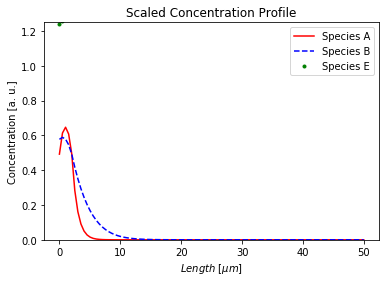

In [67]:
plt.plot(sys.x[1:-1], speciesA.conc[-1][1:-1] ,"r-", label="Species A")
plt.plot(sys.x[1:-1], speciesB.conc[-1][1:-1], "b--", label="Species B")
plt.plot(sys.x[1:-1], speciesE.conc[-1][1:-1], "g.", label="Species E")
plt.ylim(0, 1.25)
plt.legend()
plt.title("Scaled Concentration Profile")
plt.xlabel(r"$Length\ [\mu m]$")
plt.ylabel("Concentration [a. u.]")